In [1]:
import scanpy as sc
adata=sc.read("adata_preprocess.h5ad")

In [2]:
import scFates as scf
scf.tl.tree(adata,method='ppt',use_rep='X_diffusion_multiscale',Nodes=500,ppt_sigma=0.05,ppt_lambda=1000,ppt_metric='euclidean',device='cpu',seed=42)

inferring a principal tree inferring a principal tree --> parameters used 
    500 principal points, sigma = 0.05, lambda = 1000, metric = euclidean
    fitting:  40%|████      | 20/50 [00:04<00:07,  4.17it/s]
    converged
    finished (0:00:04) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


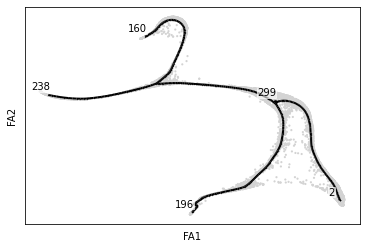

In [3]:
scf.pl.graph(adata,basis='draw_graph_fa',size_nodes=0.1,forks=False)

In [4]:
scf.tl.cleanup(adata,minbranchlength=20)

    graph cleaned --> removed 11 principal points


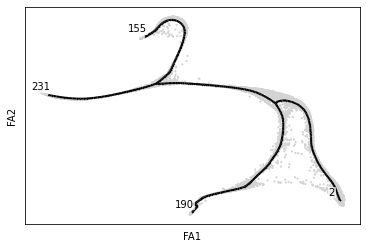

In [5]:
scf.pl.graph(adata,basis='draw_graph_fa',size_nodes=0.1,forks=False)

In [6]:
scf.tl.root(adata,231)
scf.tl.pseudotime(adata,n_jobs=80,n_map=100,seed=42)

node 231 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    mappings: 100%|██████████| 100/100 [00:49<00:00,  2.02it/s]
    finished (0:00:55) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


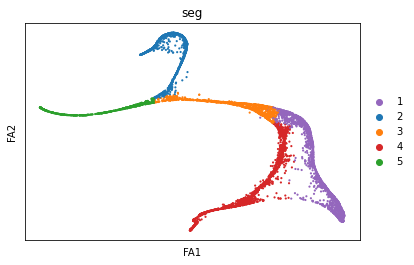

In [7]:
sc.pl.draw_graph(adata,color="seg")

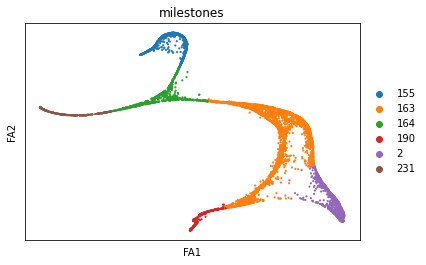

In [8]:
sc.pl.draw_graph(adata,color="milestones")

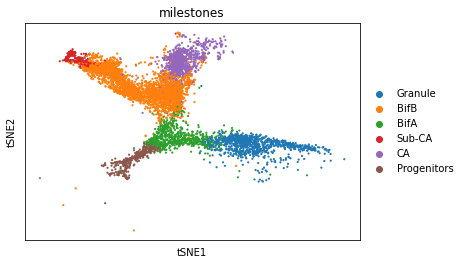

In [9]:
scf.tl.rename_milestones(adata,['Granule',
                                'BifB',
                                'BifA',
                                'Sub-CA',
                                'CA',
                                 'Progenitors'])
sc.pl.tsne(adata,color='milestones')

In [10]:
scf.tl.test_association(adata,n_jobs=40)

test features for association with the trajectory
    single mapping : 100%|██████████| 16248/16248 [04:55<00:00, 54.99it/s]
    found 2306 significant features (0:04:55) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


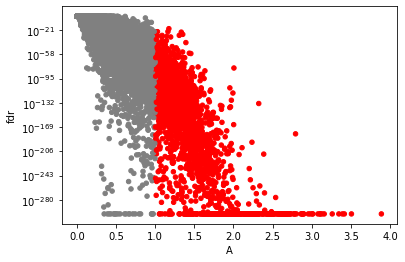

In [11]:
scf.pl.test_association(adata)

In [12]:
scf.tl.fit(adata,n_jobs=40) 

fit features associated with the trajectory
    single mapping : 100%|██████████| 2306/2306 [01:21<00:00, 28.13it/s]
    finished (adata subsetted to keep only fitted features!) (0:01:27) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [13]:
adata.write("adata_fitted.h5ad")